In [1]:
import pandas as pd

# Load the dataset from the correct path
df = pd.read_csv('/Users/stasy/Desktop/BIAnalyst_Porfolio/Project03_RocketScience/datasets/kaggle/space_missions.csv')

# Display basic information
df.info()
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 48168: invalid continuation byte

In [3]:
import pandas as pd

# Load the dataset with a different encoding (e.g., ISO-8859-1 or latin1)
df = pd.read_csv('/Users/stasy/Desktop/BIAnalyst_Porfolio/Project03_RocketScience/datasets/kaggle/space_missions.csv', encoding='ISO-8859-1')

# Display basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [5]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

# Handle missing values: Fill or drop based on relevance
# For example, filling missing numerical values with the mean or median
df['payload_mass'].fillna(df['payload_mass'].mean(), inplace=True)

# Fill missing categorical values with the most frequent value (mode)
df['launch_vehicle'].fillna(df['launch_vehicle'].mode()[0], inplace=True)

Time      127
Price    3365
dtype: int64


KeyError: 'payload_mass'

In [7]:
print(df.columns)

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')


In [9]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

# Handle missing values: For numerical columns like 'Price', fill missing values with the mean
df['Price'].fillna(df['Price'].mean(), inplace=True)

# Handle categorical columns like 'RocketStatus' or 'MissionStatus' by filling with the most frequent value (mode)
df['RocketStatus'].fillna(df['RocketStatus'].mode()[0], inplace=True)
df['MissionStatus'].fillna(df['MissionStatus'].mode()[0], inplace=True)

Time      127
Price    3365
dtype: int64


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [11]:
# Check the unique values in the 'Price' column
print(df['Price'].unique())

[nan '63.23' '59' '1,160.00' '450' '30.8' '5,000.00' '35' '136.6' '40'
 '29.75' '25' '69.7' '45' '20' '29' '64.68' '41.8' '47' '90' '109' '164'
 '200' '133' '135' '190' '17.42' '350' '130' '153' '7' '115' '21' '29.15'
 '123' '20.14' '31' '112.5' '120' '59.5' '140' '46' '30' '145' '80' '37'
 '65' '55' '56.5' '62' '100' '19' '5.3' '15' '85' '5.8' '7.5' '48.5' '39'
 '23' '67' '12' '28.3' '2.5' '4.9' '27']


In [13]:
# Remove commas and convert 'Price' column to numeric
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [15]:
# Fill missing values in 'Price' with the mean of the column
df['Price'].fillna(df['Price'].mean(), inplace=True)

/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_14811/605083203.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mean(), inplace=True)


In [17]:
# Remove commas and convert 'Price' column to numeric
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')

AttributeError: Can only use .str accessor with string values!

In [19]:
# Convert all values in 'Price' to strings to ensure compatibility with .str methods
df['Price'] = df['Price'].astype(str)

In [21]:
# Remove commas and convert 'Price' column to numeric
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')

In [23]:
# Fill missing values in 'Price' with the mean of the column
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [25]:
# Check for missing values in the other columns
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Handle missing values for categorical columns by filling with the most frequent value (mode)
df['RocketStatus'].fillna(df['RocketStatus'].mode()[0], inplace=True)
df['MissionStatus'].fillna(df['MissionStatus'].mode()[0], inplace=True)

Time    127
dtype: int64


/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_14811/3462053540.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RocketStatus'].fillna(df['RocketStatus'].mode()[0], inplace=True)
/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_14811/3462053540.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [27]:
# Fill missing values for 'RocketStatus' by reassigning
df['RocketStatus'] = df['RocketStatus'].fillna(df['RocketStatus'].mode()[0])

# Fill missing values for 'MissionStatus' by reassigning
df['MissionStatus'] = df['MissionStatus'].fillna(df['MissionStatus'].mode()[0])

In [29]:
# Drop the 'Time' column if it's not needed
df.drop(columns=['Time'], inplace=True)

In [31]:
# Convert categorical variables to 'category' data type
df['RocketStatus'] = df['RocketStatus'].astype('category')
df['MissionStatus'] = df['MissionStatus'].astype('category')

In [33]:
# Final inspection of the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company        4630 non-null   object  
 1   Location       4630 non-null   object  
 2   Date           4630 non-null   object  
 3   Rocket         4630 non-null   object  
 4   Mission        4630 non-null   object  
 5   RocketStatus   4630 non-null   category
 6   Price          4630 non-null   float64 
 7   MissionStatus  4630 non-null   category
dtypes: category(2), float64(1), object(5)
memory usage: 226.5+ KB


,Price
count,4630.000000
mean,128.303913
std,134.175634
min,2.500000
25%,128.303913
50%,128.303913
75%,128.303913
max,5000.000000


In [35]:
# Check unique values in 'Price' column again
print(df['Price'].unique())

[1.28303913e+02 6.32300000e+01 5.90000000e+01 1.16000000e+03
 4.50000000e+02 3.08000000e+01 5.00000000e+03 3.50000000e+01
 1.36600000e+02 4.00000000e+01 2.97500000e+01 2.50000000e+01
 6.97000000e+01 4.50000000e+01 2.00000000e+01 2.90000000e+01
 6.46800000e+01 4.18000000e+01 4.70000000e+01 9.00000000e+01
 1.09000000e+02 1.64000000e+02 2.00000000e+02 1.33000000e+02
 1.35000000e+02 1.90000000e+02 1.74200000e+01 3.50000000e+02
 1.30000000e+02 1.53000000e+02 7.00000000e+00 1.15000000e+02
 2.10000000e+01 2.91500000e+01 1.23000000e+02 2.01400000e+01
 3.10000000e+01 1.12500000e+02 1.20000000e+02 5.95000000e+01
 1.40000000e+02 4.60000000e+01 3.00000000e+01 1.45000000e+02
 8.00000000e+01 3.70000000e+01 6.50000000e+01 5.50000000e+01
 5.65000000e+01 6.20000000e+01 1.00000000e+02 1.90000000e+01
 5.30000000e+00 1.50000000e+01 8.50000000e+01 5.80000000e+00
 7.50000000e+00 4.85000000e+01 3.90000000e+01 2.30000000e+01
 6.70000000e+01 1.20000000e+01 2.83000000e+01 2.50000000e+00
 4.90000000e+00 2.700000

count    4630.000000
mean      128.303913
std       134.175634
min         2.500000
25%       128.303913
50%       128.303913
75%       128.303913
max      5000.000000
Name: Price, dtype: float64


<Axes: title={'center': 'Distribution of Price'}, ylabel='Frequency'>

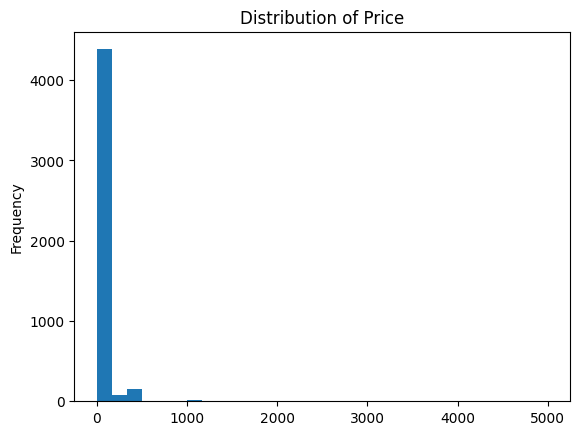

In [37]:
# Check summary statistics for 'Price'
print(df['Price'].describe())

# Plot the distribution of 'Price'
df['Price'].plot(kind='hist', bins=30, title='Distribution of Price')

In [39]:
# Drop the 'Price' column
df.drop(columns=['Price'], inplace=True)

In [41]:
# Extract year from 'Date' column
df['LaunchYear'] = df['Date'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [43]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Now extract the year from the 'Date' column
df['LaunchYear'] = df['Date'].dt.year

In [45]:
# Check the first few rows of the 'Date' column after conversion
print(df[['Date', 'LaunchYear']].head())

        Date  LaunchYear
0 1957-10-04        1957
1 1957-11-03        1957
2 1957-12-06        1957
3 1958-02-01        1958
4 1958-02-05        1958


In [47]:
# Create binary column for mission success
df['MissionSuccess'] = df['MissionStatus'].apply(lambda x: 1 if x == 'Success' else 0)

In [49]:
# Convert 'RocketStatus' to categorical codes
df['RocketStatusCode'] = df['RocketStatus'].cat.codes

<Axes: title={'center': 'Mission Success Rate Over Years'}, xlabel='LaunchYear', ylabel='Success Rate'>

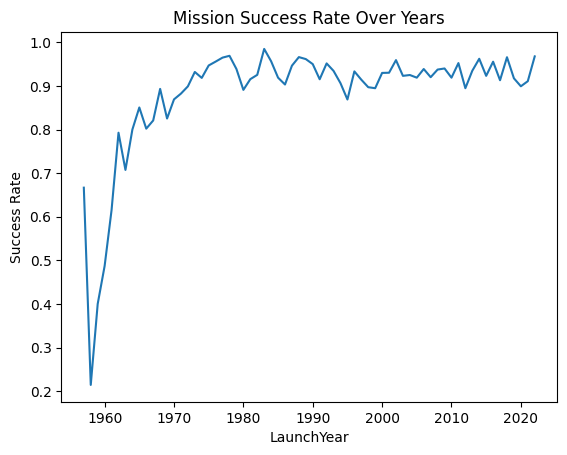

In [51]:
# Plot mission success rate over years
success_by_year = df.groupby('LaunchYear')['MissionSuccess'].mean()
success_by_year.plot(kind='line', title='Mission Success Rate Over Years', ylabel='Success Rate')

<Axes: xlabel='RocketStatus', ylabel='count'>

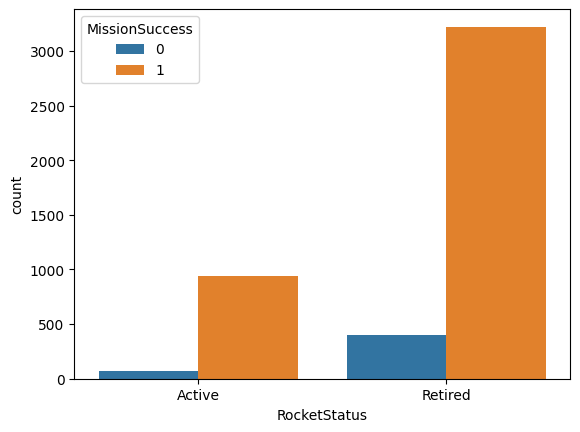

In [53]:
import seaborn as sns

# Plot mission success based on RocketStatus
sns.countplot(x='RocketStatus', hue='MissionSuccess', data=df)

In [55]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['RocketStatusCode', 'LaunchYear']]  # Add other features if relevant
y = df['MissionSuccess']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8866090712742981


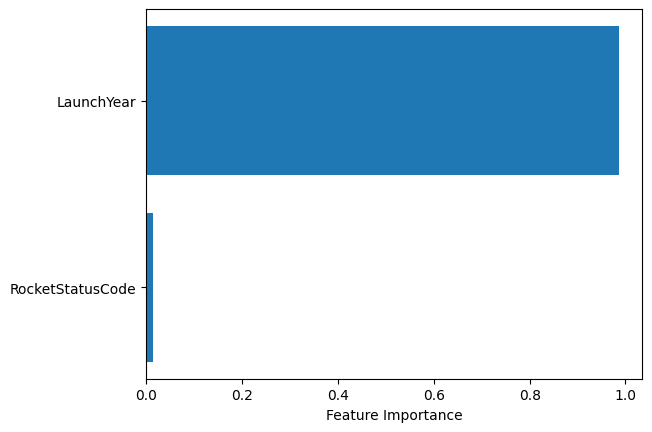

In [59]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Plot feature importance
feature_importances = rf_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.show()

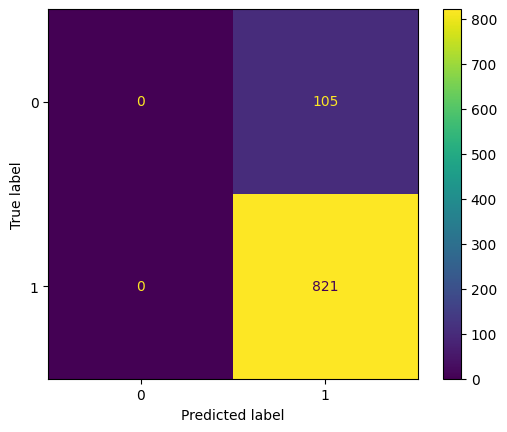

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

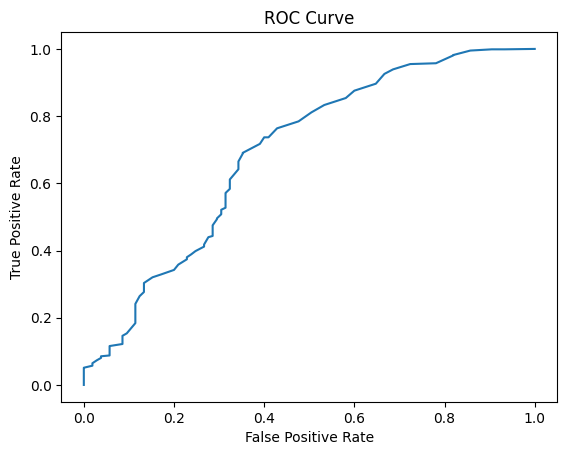

In [63]:
from sklearn.metrics import roc_curve

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

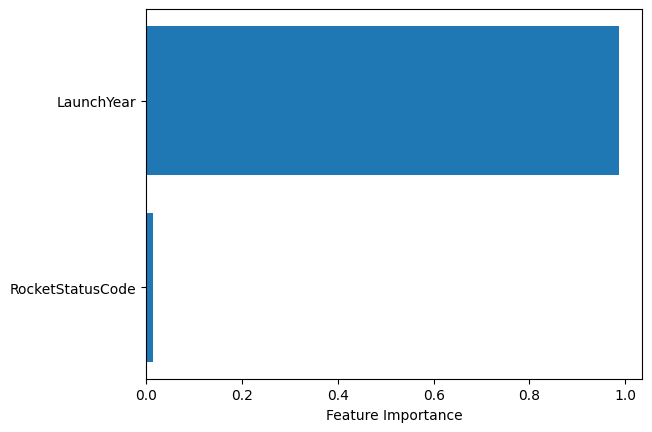

In [65]:
# Random Forest for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importances = rf_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.show()

In [67]:
# If categorical features aren't numeric, convert them to numeric codes
df['RocketStatusCode'] = df['RocketStatus'].cat.codes

In [69]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

ValueError: could not convert string to float: 'RVSN USSR'

In [71]:
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

                LaunchYear  MissionSuccess
LaunchYear        1.000000        0.143126
MissionSuccess    0.143126        1.000000


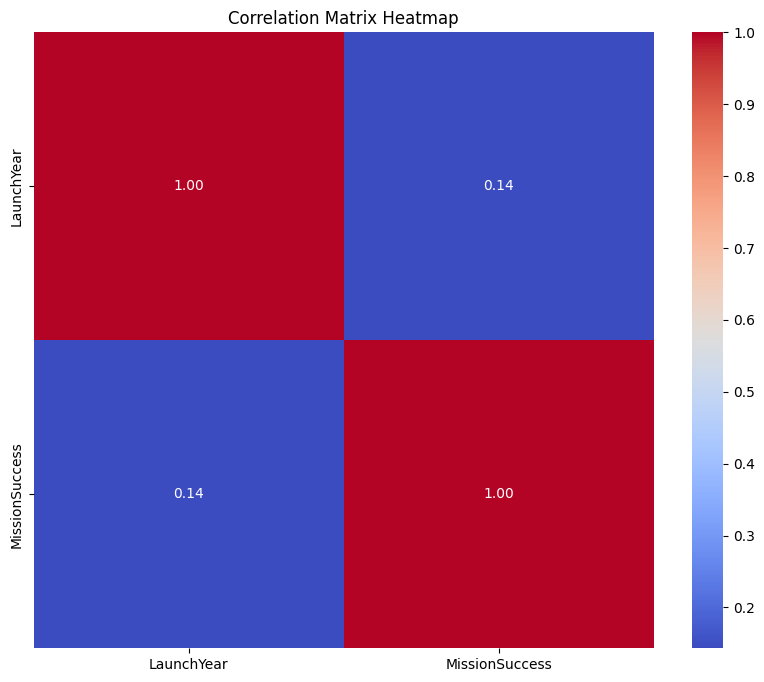

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

In [75]:
# Correlation of features with MissionSuccess
print(correlation_matrix['MissionSuccess'].sort_values(ascending=False))

MissionSuccess    1.000000
LaunchYear        0.143126
Name: MissionSuccess, dtype: float64


In [77]:
# Select the relevant features based on correlation matrix
X = df[['RocketStatusCode', 'LaunchYear']]  # Add or remove features based on your findings
y = df['MissionSuccess']

In [79]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8866090712742981


In [83]:
# Get feature importance (coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
print(coefficients.sort_values(by='Coefficient', ascending=False))

            Feature  Coefficient
0  RocketStatusCode     0.770235
1        LaunchYear     0.034811


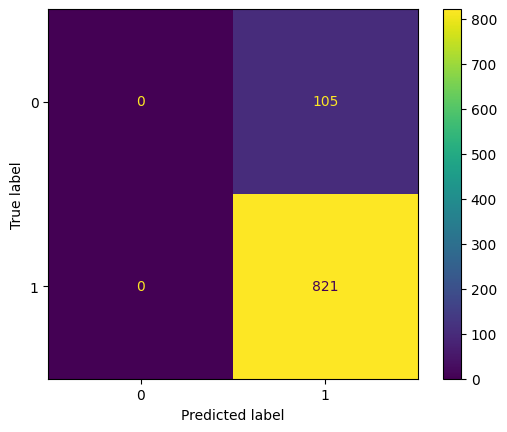

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.show()

In [87]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model performance
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Get feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Random Forest Accuracy: 0.896328293736501
            Feature  Importance
1        LaunchYear    0.986342
0  RocketStatusCode    0.013658


In [89]:
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning with Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],   # Type of regularization
    'solver': ['liblinear']    # Solver type for small datasets
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9019980304190831


/Users/stasy/anaconda3/envs/DS_Portfolio/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [91]:
# Re-run GridSearch with increased max_iter to allow more iterations
param_grid = {
    'C': [0.01, 0.1, 1, 10], 
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear'],  
    'max_iter': [100, 200, 500]  # Increase max_iter to ensure convergence
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score after increasing max_iter
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

/Users/stasy/anaconda3/envs/DS_Portfolio/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/stasy/anaconda3/envs/DS_Portfolio/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/stasy/anaconda3/envs/DS_Portfolio/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9019980304190831


/Users/stasy/anaconda3/envs/DS_Portfolio/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/stasy/anaconda3/envs/DS_Portfolio/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [93]:
param_grid = {
    'C': [0.01, 0.1, 1], 
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear'],  
    'max_iter': [200, 500, 1000]  # Further increasing max_iter
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score after increasing max_iter further
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

NameError: name 'X_train_scaled' is not defined

In [95]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1], 
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear'],  
    'max_iter': [200, 500, 1000]  # Further increasing max_iter
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Run the grid search with the scaled data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score after increasing max_iter
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'C': 0.01, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9019980304190831


In [99]:
# Retrain the model using the best parameters
best_model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', max_iter=200)

# Fit the model on the training data
best_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, max_iter=200, penalty='l1', solver='liblinear')

In [101]:
# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

In [103]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

Test Set Accuracy: 0.8866090712742981


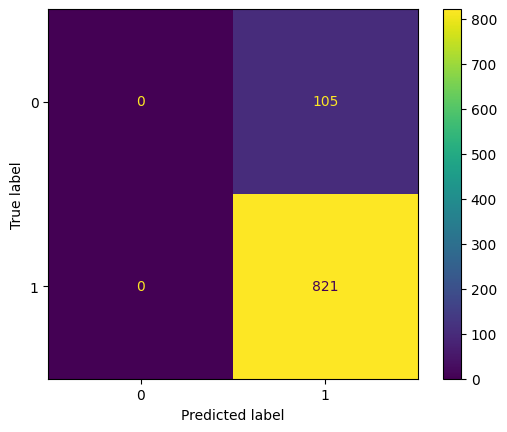

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test)
plt.show()

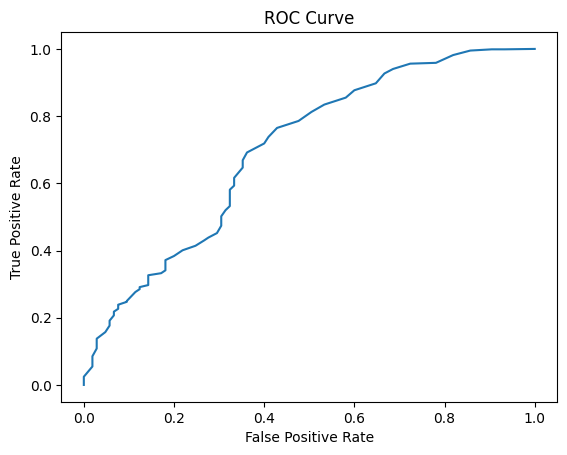

In [107]:
from sklearn.metrics import roc_curve

# Get the probabilities for the positive class
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [109]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Precision: 0.8866090712742981, Recall: 1.0, F1 Score: 0.9398969662278192


In [111]:
# Adjust the threshold for classifying a successful launch
threshold = 0.6  # You can adjust this value
y_pred_adjusted = (best_model.predict_proba(X_test_scaled)[:, 1] >= threshold).astype(int)

# Recalculate precision, recall, and F1 score with the adjusted threshold
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)

print(f"Adjusted Precision: {precision_adjusted}, Adjusted Recall: {recall_adjusted}, Adjusted F1 Score: {f1_adjusted}")

Adjusted Precision: 0.8866090712742981, Adjusted Recall: 1.0, Adjusted F1 Score: 0.9398969662278192


In [113]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
print(f"AUC Score: {auc_score}")

AUC Score: 0.6995707905573922


In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Adjust the threshold for classifying a successful launch
threshold = 0.6  # Adjust this value as needed
y_pred_adjusted = (best_model.predict_proba(X_test_scaled)[:, 1] >= threshold).astype(int)

# Recalculate precision, recall, and F1 score with the adjusted threshold
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)

print(f"Adjusted Precision: {precision_adjusted}")
print(f"Adjusted Recall: {recall_adjusted}")
print(f"Adjusted F1 Score: {f1_adjusted}")

Adjusted Precision: 0.8866090712742981
Adjusted Recall: 1.0
Adjusted F1 Score: 0.9398969662278192


Confusion Matrix:
 [[  0 105]
 [  0 821]]


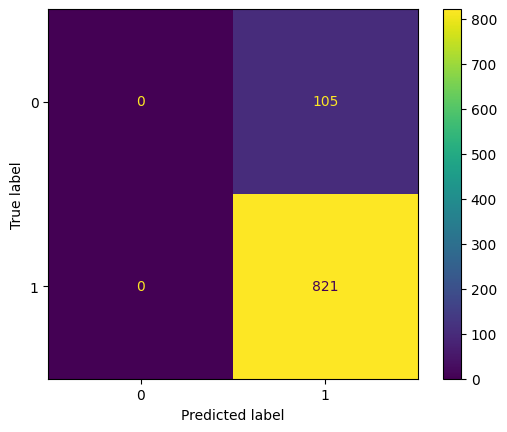

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for adjusted predictions
cm = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [119]:
# Get false positives (predicted success, actual failure)
false_positives = X_test[(y_pred_adjusted == 1) & (y_test == 0)]

# Get false negatives (predicted failure, actual success)
false_negatives = X_test[(y_pred_adjusted == 0) & (y_test == 1)]

# Display a few false positives
print("False Positives:")
print(false_positives.head())

# Display a few false negatives
print("False Negatives:")
print(false_negatives.head())

False Positives:
      RocketStatusCode  LaunchYear
805                  1        1969
3166                 1        2000
33                   1        1959
3121                 1        2000
230                  1        1963
False Negatives:
Empty DataFrame
Columns: [RocketStatusCode, LaunchYear]
Index: []


In [121]:
# Example of trying a different threshold
threshold = 0.7  # Try another threshold
y_pred_adjusted_2 = (best_model.predict_proba(X_test_scaled)[:, 1] >= threshold).astype(int)

# Recalculate precision, recall, and F1 score with the new threshold
precision_adjusted_2 = precision_score(y_test, y_pred_adjusted_2)
recall_adjusted_2 = recall_score(y_test, y_pred_adjusted_2)
f1_adjusted_2 = f1_score(y_test, y_pred_adjusted_2)

print(f"Precision (Threshold 0.7): {precision_adjusted_2}")
print(f"Recall (Threshold 0.7): {recall_adjusted_2}")
print(f"F1 Score (Threshold 0.7): {f1_adjusted_2}")

Precision (Threshold 0.7): 0.8866090712742981
Recall (Threshold 0.7): 1.0
F1 Score (Threshold 0.7): 0.9398969662278192
